In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
columns = ['Temp','Nausea','LumberPain', 'UrinePushing','MictPain','Burning','label1','label2']
df = pd.read_csv('diagnosis.data', encoding='utf-16',sep='\t')
df = df.set_axis(columns, axis=1, inplace=False)
df.head()

,Temp,Nausea,LumberPain,UrinePushing,MictPain,Burning,label1,label2
0,"35,9",no,no,yes,yes,yes,yes,no
1,"35,9",no,yes,no,no,no,no,no
2,"36,0",no,no,yes,yes,yes,yes,no
3,"36,0",no,yes,no,no,no,no,no
4,"36,0",no,yes,no,no,no,no,no


In [3]:
# label1 = Inflammation of urinary bladder
# label2 = Nephritis of renal pelvis origin

def Encoding(x):
    return np.where(x=='yes',1,0)

df_temp = df.iloc[:,1:].apply(Encoding)
df_temp.head()

,Nausea,LumberPain,UrinePushing,MictPain,Burning,label1,label2
0,0,0,1,1,1,1,0
1,0,1,0,0,0,0,0
2,0,0,1,1,1,1,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [4]:
df.Temp = [float(str(i).replace(",", ".")) for i in df["Temp"]]
df.Temp = (df.Temp - np.mean(df.Temp))/np.max(df.Temp)
df_temp['Temp'] = df.Temp
df_temp.head()


,Nausea,LumberPain,UrinePushing,MictPain,Burning,label1,label2,Temp
0,0,0,1,1,1,1,0,-0.068705
1,0,1,0,0,0,0,0,-0.068705
2,0,0,1,1,1,1,0,-0.066295
3,0,1,0,0,0,0,0,-0.066295
4,0,1,0,0,0,0,0,-0.066295


In [5]:
from sklearn.model_selection import train_test_split

x = df_temp.drop(['label1','label2'], axis =1).values.astype(float)
y = df_temp.label1.values.astype(float)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [6]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(units = 32, activation ='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units = 16, activation ='relu'),
    tf.keras.layers.Dense(units = 8,  activation ='relu'),
    tf.keras.layers.Dense(units = 4,  activation ='relu'),
    tf.keras.layers.Dense(units = 1,  activation ='sigmoid')
])


model.compile(
            loss = tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'] 
)

history = model.fit(x_train,y_train, epochs =100, verbose =1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 131ms/step - loss: 0.7003 - accuracy: 0.3521 - val_loss: 0.6919 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5634 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6882 - accuracy: 0.5775 - val_loss: 0.6857 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6843 - accuracy: 0.6620 - val_loss: 0.6841 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6814 - accuracy: 0.6901 - val_loss: 0.6822 - val_accuracy: 0.7222
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6788 - accuracy: 0.7606 - val_loss: 0.6799 - val_accuracy: 0.5556
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6761 - accuracy: 0.7042 - val_loss: 0.6776 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

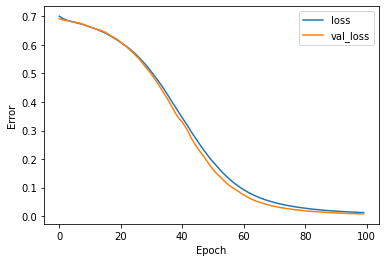

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [8]:
(model.predict(x_test).round().T == y_test).mean()

1/1 [==============================] - 0s 119ms/step


1.0